## Lesson 1.3: Resource Management & Performance Metrics in Parallel Systems

Efficient resource management and accurate performance metrics are crucial for optimizing High-Performance Computing (HPC) systems. In this lesson, we explore the interplay between these two aspects, emphasizing their importance in achieving optimal performance in parallel systems.


### Key Concepts

1. **Resource Management in Parallel Systems**:
   - Resource managers are responsible for efficient allocation and management of computing resources such as CPUs, memory, storage, and network bandwidth.
   - **Job Scheduling**: The order and placement of computational tasks across resources, using strategies like First-Come-First-Serve (FCFS), Shortest Job Next (SJN), and more advanced techniques like backfilling and gang scheduling.
   - **Resource Allocation**: Dynamically assigning resources based on job requirements, either through static or dynamic allocation.
   - **Load Balancing**: Ensuring even distribution of workloads across system nodes to prevent overburdening and underutilization.
   - **Monitoring & Reporting**: Continuous tracking of resource usage and system health to maintain stability and performance.
   - **Job Prioritization**: Assigning priority levels to ensure critical tasks receive necessary resources promptly.
   - **User Management**: Handling user access and permissions, ensuring equitable distribution of computational power.
   - **Fault Tolerance & Recovery**: Implementing strategies like job checkpointing to minimize failure impacts.

2. **Performance Metrics in Parallel Systems**:
   - **Throughput**: Number of jobs completed in a given time period.
   - **Latency**: Time taken to complete a single job from start to finish.
   - **Utilization**: Degree to which system resources are used effectively.
   - **Efficiency**: Ratio of useful work performed to total resources consumed.
   - **Scalability**: System’s ability to handle increasing workloads by adding more resources.

3. **Amdahl's Law**:
   - Describes the potential speedup of a task when part of it can be parallelized, with the formula:
     \[
     S = \frac{1}{(1 - P) + \frac{P}{N}}
     \]
     where \( S \) is the speedup, \( P \) is the parallelizable portion, and \( N \) is the number of processors.
   - Highlights the limitations of parallel speedup and the impact of the non-parallelizable portion on overall performance.


In [1]:
import heapq
import time

# Define jobs with (priority, job_id, execution_time, resources_needed)
jobs = [
    (1, 'Job_1', 4, 2),
    (3, 'Job_2', 2, 1),
    (2, 'Job_3', 3, 3),
    (1, 'Job_4', 5, 2)
]

# First-Come-First-Serve (FCFS) Scheduler
def fcfs_scheduler(jobs):
    print("FCFS Scheduling")
    current_time = 0
    for job in jobs:
        print(f"Starting {job[1]} at time {current_time}")
        time.sleep(job[2])  # Simulate job execution
        current_time += job[2]
        print(f"Completed {job[1]} at time {current_time}")

# Priority-based Scheduler using a Min-Heap
def priority_scheduler(jobs):
    print("Priority-based Scheduling")
    heapq.heapify(jobs)  # Convert jobs list into a heap
    current_time = 0
    while jobs:
        job = heapq.heappop(jobs)  # Pop the job with the highest priority (lowest priority value)
        print(f"Starting {job[1]} at time {current_time}")
        time.sleep(job[2])  # Simulate job execution
        current_time += job[2]
        print(f"Completed {job[1]} at time {current_time}")

# Additional Example: Round-Robin Scheduler
def round_robin_scheduler(jobs, time_slice):
    print("Round-Robin Scheduling")
    queue = jobs[:]
    current_time = 0
    while queue:
        job = queue.pop(0)
        exec_time = min(time_slice, job[2])
        print(f"Starting {job[1]} at time {current_time} for {exec_time} units")
        time.sleep(exec_time)
        current_time += exec_time
        if job[2] > time_slice:
            # Requeue the job with remaining time
            queue.append((job[0], job[1], job[2] - time_slice, job[3]))
        else:
            print(f"Completed {job[1]} at time {current_time}")

# Run the schedulers
print("=== FCFS ===")
fcfs_scheduler(jobs)
print("\n=== Priority-Based ===")
priority_scheduler(jobs)

# Round-Robin with a time slice of 2 time units
print("\n=== Round-Robin ===")
round_robin_scheduler(jobs, time_slice=2)


=== FCFS ===
FCFS Scheduling
Starting Job_1 at time 0
Completed Job_1 at time 4
Starting Job_2 at time 4
Completed Job_2 at time 6
Starting Job_3 at time 6
Completed Job_3 at time 9
Starting Job_4 at time 9
Completed Job_4 at time 14

=== Priority-Based ===
Priority-based Scheduling
Starting Job_1 at time 0
Completed Job_1 at time 4
Starting Job_4 at time 4
Completed Job_4 at time 9
Starting Job_3 at time 9
Completed Job_3 at time 12
Starting Job_2 at time 12
Completed Job_2 at time 14

=== Round-Robin ===
Round-Robin Scheduling


### Explanation of Priority-Based Scheduler and `heapq.heappop`

The priority-based scheduler uses Python's `heapq` module to efficiently manage the job queue. In this implementation:

- **Priority Queue**: Jobs are stored in a heap, a complete binary tree where the smallest element is at the root.
- **`heapq.heappop`**: Pops the smallest item from the heap, which is the job with the highest priority (lowest numerical value). This ensures efficient retrieval and execution of high-priority jobs.

### Questions to Consider
- How does job priority affect overall system efficiency?
- What are the trade-offs between FCFS and priority-based scheduling?
- How do different scheduling strategies impact job completion times and resource utilization?


### Key Concepts

1. **Amdahl's Law**:
   - **Definition**: Amdahl's Law describes the theoretical maximum speedup for a task as more processors are added. It is expressed by the formula:
     \[
     S = \frac{1}{(1 - P) + \frac{P}{N}}
     \]
     where \( S \) is the speedup, \( P \) is the parallelizable portion of the task, and \( N \) is the number of processors.
   - **Implications**: As the number of processors increases, the speedup is limited by the sequential portion of the task. Even with an infinite number of processors, the maximum achievable speedup is constrained by the fraction of the task that cannot be parallelized.

2. **Sequential Bottleneck**:
   - The sequential portion of a task imposes a limit on how much the overall execution time can be reduced through parallelization.

3. **Diminishing Returns**:
   - Beyond a certain point, adding more processors results in increasingly smaller gains in performance, highlighting the importance of optimizing the parallelizable


## Exercise: Amdahl's Law in Action

In this exercise, we'll explore Amdahl's Law by simulating a computational task that consists of both a parallelizable and a non-parallelizable component. We'll see how the total execution time and speedup change as the number of processors increases.

### Amdahl's Law

Amdahl's Law states that the potential speedup of a program using multiple processors is limited by the portion of the program that cannot be parallelized. It is defined as:

\[ S(N) = \frac{1}{(1 - P) + \frac{P}{N}} \]

Where:
- \( S(N) \) is the speedup with \( N \) processors.
- \( P \) is the proportion of the program that can be parallelized.
- \( N \) is the number of processors.

This exercise will show how the speedup is affected as the number of processors increases, especially when a portion of the task is inherently sequential.

### Python Code: Amdahl's Law Simulation


Processors: 1, Time taken: 0.1007 seconds, Speedup: 1.00x
Processors: 2, Time taken: 0.0465 seconds, Speedup: 2.16x
Processors: 4, Time taken: 0.0272 seconds, Speedup: 3.70x
Processors: 8, Time taken: 0.0179 seconds, Speedup: 5.63x
Processors: 16, Time taken: 0.0134 seconds, Speedup: 7.50x
Processors: 32, Time taken: 0.0113 seconds, Speedup: 8.94x
Processors: 64, Time taken: 0.0097 seconds, Speedup: 10.33x


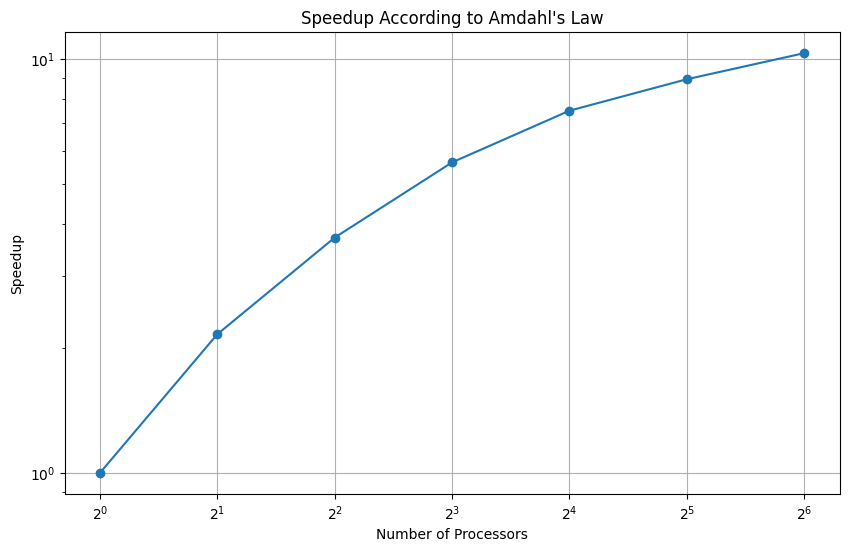

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

def simulate_task(parallel_fraction, total_work_units, num_processors):
    """
    Simulates a computational task based on the parallelizable fraction and number of processors.

    Args:
    - parallel_fraction (float): The fraction of the task that can be parallelized.
    - total_work_units (int): Total amount of work to be done (work units).
    - num_processors (int): Number of processors to simulate.

    Returns:
    - total_time (float): Total time taken to complete the task.
    """
    # Non-parallelizable part of the task
    non_parallel_work_units = int(total_work_units * (1 - parallel_fraction))
    start_time = time.time()
    # Simulate non-parallelizable work (this runs on a single processor)
    for _ in range(non_parallel_work_units):
        np.sqrt(12345.6789)  # Example operation
    non_parallel_time = time.time() - start_time

    # Parallelizable part of the task
    parallel_work_units_per_processor = int((total_work_units * parallel_fraction) / num_processors)
    start_time = time.time()
    # Simulate parallelizable work (divided across processors)
    for _ in range(parallel_work_units_per_processor):
        np.sqrt(12345.6789)  # Example operation
    parallel_time = time.time() - start_time

    # Total time is the non-parallel time plus the parallel time
    total_time = non_parallel_time + parallel_time

    return total_time

# Parameters for the simulation
parallel_fraction = 0.9  # 90% of the task can be parallelized
total_work_units = 100000  # Total work units
num_processors_list = [1, 2, 4, 8, 16, 32, 64]  # Different numbers of processors

# Running the simulation for different numbers of processors
times = []
speedups = []
for num_processors in num_processors_list:
    time_taken = simulate_task(parallel_fraction, total_work_units, num_processors)
    times.append(time_taken)
    speedups.append(times[0] / time_taken)  # Speedup is relative to the time with 1 processor
    print(f"Processors: {num_processors}, Time taken: {time_taken:.4f} seconds, Speedup: {speedups[-1]:.2f}x")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_processors_list, speedups, marker='o')
plt.title("Speedup According to Amdahl's Law")
plt.xlabel("Number of Processors")
plt.ylabel("Speedup")
plt.grid(True)
plt.xscale("log", base=2)
plt.yscale("log")
plt.show()


### Explanation of the Code

This Python code simulates the impact of Amdahl's Law on a computational task by varying the number of processors and measuring the time taken for a task with a fixed parallelizable portion.

- **`simulate_task(parallel_fraction, total_work_units, num_processors)` Function**:
  - **`parallel_fraction`**: The fraction of the task that can be parallelized.
  - **`total_work_units`**: The total number of work units (a measure of task size).
  - **`num_processors`**: The number of processors used in the simulation.

- **Non-parallelizable Work**: This portion of the task runs on a single processor, representing the part of the task that cannot benefit from parallelization.

- **Parallelizable Work**: This portion of the task is divided among the available processors, simulating the work that can be done in parallel.

- **Results**:
  - The simulation calculates the total time taken for the task with different numbers of processors.
  - Speedup is calculated relative to the time taken with a single processor.
  - The results are plotted on a log-log scale to visualize how speedup behaves as the number of processors increases.

### Questions to Consider
- How does the speedup change as the number of processors increases?
- What does this tell you about the limitations of parallel computing as described by Amdahl's Law?
- Why does the speedup plateau even as more processors are added?


### Conclusion

Amdahl's Law provides a fundamental insight into the limitations of parallel computing. By simulating a computational task with both parallelizable and non-parallelizable components, this exercise has shown how the speedup is limited by the fraction of the task that cannot be parallelized. This understanding is critical when working with high-performance computing systems, where optimizing both the parallel and sequential portions of tasks can lead to significant performance improvements.

### Additional Resources
- **Books**:
  - "Introduction to Parallel Computing" by Ananth Grama, Anshul Gupta, et al.
  - "Parallel and High Performance Computing" by Robert Robey and Yuliana Zamora.
- **Websites**:
  - [Amdahl's Law on Wikipedia](https://en.wikipedia.org/wiki/Amdahl%27s_law)
  - [Introduction to Parallel Computing](https://computing.llnl.gov/tutorials/parallel_comp/)


## Lesson 1.4: Understanding HPC Benchmarking

HPC Benchmarking is a critical practice in High-Performance Computing (HPC) used to evaluate and compare the performance of different systems. By running standardized benchmarks, administrators and researchers can assess how well a system performs under various workloads, guiding optimization efforts and system selection.

This lesson will cover the basics of HPC benchmarking, key metrics, and how to simulate a simple benchmark using Python.


### Key Concepts

1. **HPC Benchmarking**:
   - **Definition**: HPC Benchmarking involves running specific programs or tests designed to measure the performance of HPC systems. Common benchmarks include HPL (High Performance Linpack), HPCG (High Performance Conjugate Gradients), and STREAM.
   - **Purpose**: The primary goals of benchmarking are to assess system performance, compare different HPC systems, and identify potential bottlenecks.

2. **Key Metrics**:
   - **FLOPS**: Floating-point operations per second, a measure of computational power.
   - **Memory Bandwidth**: The rate at which data can be read from or stored into memory by the processor.
   - **Latency**: The time it takes to complete a single task or operation.
   - **Scalability**: How well a system can maintain performance as more resources (e.g., processors, memory) are added.

3. **Types of Benchmarks**:
   - **HPL (High Performance Linpack)**: Measures the system's ability to solve a dense system of linear equations.
   - **HPCG (High Performance Conjugate Gradients)**: Focuses on real-world computational and data access patterns.
   - **STREAM**: Evaluates sustainable memory bandwidth.


### Practical Exercise: Simulating a Simple HPC Benchmark

In this exercise, you'll write Python code to simulate a simple benchmark that measures the performance of a matrix multiplication task, which is a common operation in scientific computing. This simulation will help you understand how benchmarks can be used to evaluate computational performance.


Matrix size: 100x100, Time taken: 0.0021 seconds
Matrix size: 200x200, Time taken: 0.0014 seconds
Matrix size: 400x400, Time taken: 0.0063 seconds
Matrix size: 800x800, Time taken: 0.0649 seconds
Matrix size: 1600x1600, Time taken: 0.3853 seconds
Matrix size: 3200x3200, Time taken: 2.3564 seconds


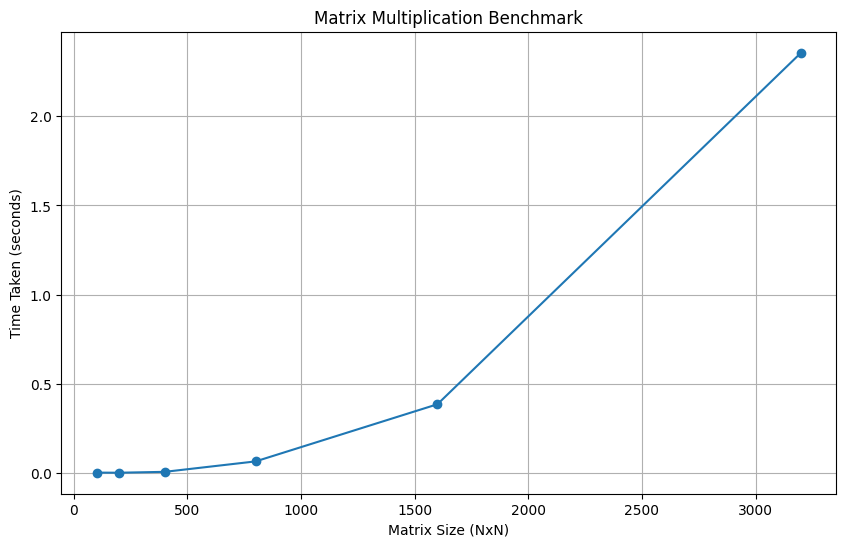

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Function to perform matrix multiplication and measure time taken
def matrix_multiplication_benchmark(size):
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    start_time = time.time()
    C = np.dot(A, B)
    end_time = time.time()

    return end_time - start_time

# Sizes of the matrices
sizes = [100, 200, 400, 800, 1600, 3200]

# Running the benchmark
times = []
for size in sizes:
    time_taken = matrix_multiplication_benchmark(size)
    times.append(time_taken)
    print(f"Matrix size: {size}x{size}, Time taken: {time_taken:.4f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title("Matrix Multiplication Benchmark")
plt.xlabel("Matrix Size (NxN)")
plt.ylabel("Time Taken (seconds)")
plt.grid(True)
plt.show()


### Explanation of the HPC Benchmark Simulation Code

This Python code simulates a simple HPC benchmark by measuring the time taken to perform matrix multiplication for matrices of different sizes.

- **`matrix_multiplication_benchmark(size)` Function**: This function generates two random matrices of the specified size and multiplies them using NumPy's `dot` function. The time taken to complete the multiplication is measured using Python's `time` module.
- **`sizes`**: A list of matrix sizes (e.g., 100x100, 200x200) to test the benchmark on increasing scales.
- **Benchmark Execution**: The benchmark is run for each matrix size, and the time taken is recorded and printed.
- **Plotting**: The results are plotted using Matplotlib, showing how the time taken for matrix multiplication increases with the size of the matrices.

### Questions to Consider
- How does the time taken for matrix multiplication scale with the size of the matrices?
- What does this tell you about the computational complexity of matrix multiplication?
- How could this benchmark help in evaluating the performance of different HPC systems?


### Analysis and Discussion

From the benchmark results, you can observe how the time taken for matrix multiplication increases as the size of the matrices grows. This is expected, as matrix multiplication is an \(O(N^3)\) operation, meaning the time complexity increases cubically with the size of the matrices.

This simple benchmark provides valuable insights into the computational performance of the system. In a real-world HPC environment, similar benchmarks would be used to evaluate different systems' capabilities and guide decisions on hardware upgrades or system configurations.

### Questions for Further Exploration
- How would the results differ on a multi-core system compared to a single-core system?
- What other operations could you benchmark to evaluate different aspects of system performance, such as memory bandwidth or I/O speed?
